In [11]:
%matplotlib inline

import sys
import PIL.Image
import scipy.misc, scipy.io, scipy.optimize

from numpy import *
import pylab
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlaba

from util import Util

EX_DIRECTORY_PATH = './data/'

def featureNormalize( data ):
    mu             = mean( data, axis=0 )
    data_norm     = data - mu
    sigma         = std( data_norm, axis=0, ddof=1 )
    data_norm     = data_norm / sigma
    return data_norm, mu, sigma

def computeCost( theta, X, y, lamda ):
    theta         = theta.reshape( shape(X)[1], 1 )
    m             = shape( X )[0]
    term1         = X.dot( theta ) - y 
    left_term     = term1.T.dot( term1 ) / (2 * m)
    right_term  = theta[1:].T.dot( theta[1:] ) * (lamda / (2*m))
    J = (left_term + right_term).flatten()[0]
    return J

def computeGradient( theta, X, y, lamda ):
    theta         = theta.reshape( shape(X)[1], 1 )
    m             = shape( X )[0]
    grad         = X.dot( theta ) - y 
    grad         = X.T.dot( grad) / m
    grad[1:]    = grad[1:] + theta[1:] * lamda / m

    return grad.flatten()

def linearReg( theta, X, y, lamda ):
    cost = computeCost( theta, X, y, lamda )
    grad = computeGradient( theta, X, y, lamda )
    return grad

def train(X, y, lamda, use_scipy=False):
    theta = zeros( (shape(X)[1], 1) )

    if use_scipy is True:
        result = scipy.optimize.fmin_cg( computeCost, fprime = computeGradient, x0 = theta, 
                                         args = (X, y, lamda), maxiter = 200, disp = True, full_output = True )
    else:
        result = Util.fmincg( f=computeCost, fprime=computeGradient, x0=theta, args=(X, y, lamda), maxiter=200 )

    return result[1], result[0]

def plot( X, y, theta ):
    m = shape( X )[0]
    pyplot.plot( X, y, 'ro' )
    pyplot.plot( X, c_[ ones((m, 1)), X ].dot( theta ) )
    pyplot.show( block = True )

def learningCurve( X, y, X_val, y_val, lamda ):
    m = shape( X )[0]
    X = c_[ones((m, 1)), X]
    error_train = []
    error_val = []

    m_val = shape( X_val )[0]
    X_val = c_[ones((m_val, 1)), X_val]

    for i in range( 0, m ):
        cost, theta = train( X[0:i+1,:], y[0:i+1,:], lamda )

        error_train.append( computeCost( theta, X[0:i+1,:], y[0:i+1,:], lamda ) )
        error_val.append( computeCost( theta, X_val, y_val, lamda ) )

    error_train = array(error_train)
    error_val     = array(error_val)

    # number of training examples
    temp = array([x for x in range(1, m+1)])

    pyplot.ylabel('Error')
    pyplot.xlabel('Number of training examples')
    pyplot.ylim([-2, 100])
    pyplot.xlim([0, 13])
    pyplot.plot( temp, error_train, color='b', linewidth=2, label='Train' )
    pyplot.plot( temp, error_val, color='g', linewidth=2, label='Cross Validation' )
    pyplot.legend()
    pyplot.show( block=True )
    return error_train, error_val

def polyFeatures( X, p ):
    out = copy(X)
    for i in range(1, p):
        out = c_[out, X**(i+1)]
    return out

def validationCurve( X, y, X_val, y_val ):
    lamda_vec     = array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0]).T
    error_train = []
    error_val     = []

    for lamda in lamda_vec:
        cost, theta = train( X, y, lamda )
        
        error_train.append( computeCost( theta, X, y, lamda ) )
        error_val.append( computeCost( theta, X_val, y_val, lamda ) )

    error_train = array( error_train )
    error_val     = array( error_val )
    
    pyplot.ylabel('Error')
    pyplot.xlabel('Lambda')
    pyplot.plot( lamda_vec, error_train, 'b', label='Train' )
    pyplot.plot( lamda_vec, error_val, 'g', label='Cross Validation' )
    pyplot.legend()
    pyplot.show( block=True )

    return error_train, error_val

def plotFit(min_x, max_x, mu, sigma, theta, p):
    x         = arange( min_x - 15, max_x + 25, 0.05 )
    X_poly     = polyFeatures( x, p )
    X_poly     = (X_poly - mu) / sigma
    X_poly     = c_[ ones((shape(x)[0], 1)), X_poly ]
    pyplot.plot( x, X_poly.dot(theta), linestyle='--', linewidth=3 )

def part1_1():
    mat = scipy.io.loadmat( EX_DIRECTORY_PATH +  "ex5data1.mat" )
    X, y             = mat['X'], mat['y']

    pyplot.scatter( X, y, marker='x', c='r', s=30, linewidth=2 )
    pyplot.xlim([-55, 45])
    pyplot.ylim([-0.5, 45])
    pyplot.xlabel('Change in water level(x)')
    pyplot.ylabel('Water flowing out of the dam(y)')
    pyplot.show()

def part1_2():
    mat = scipy.io.loadmat( EX_DIRECTORY_PATH +  "ex5data1.mat" )
    X, y             = mat['X'], mat['y']
    X_val, y_val     = mat['Xval'], mat['yval']
    X_test, y_test     = mat['Xtest'], mat['ytest']

    theta             = array([[1, 1]]).T
    
    print(computeCost( theta, c_[ones((shape(X)[0], 1)), X  ] , y, 1.0 ))

def part1_3():
    mat = scipy.io.loadmat( EX_DIRECTORY_PATH +  "ex5data1.mat" )
    X, y             = mat['X'], mat['y']
    X_val, y_val     = mat['Xval'], mat['yval']
    X_test, y_test     = mat['Xtest'], mat['ytest']

    theta             = array([[1, 1]]).T
    
    print(computeGradient( theta, c_[ones((shape(X)[0], 1)), X  ] , y, 1.0 ))

def part1_4():
    mat = scipy.io.loadmat( EX_DIRECTORY_PATH +  "ex5data1.mat" )
    X, y             = mat['X'], mat['y']

    pyplot.scatter( X, y, marker='x', c='r', s=30, linewidth=2 )
    pyplot.xlim([-55, 45])
    pyplot.ylim([-5, 45])
    pyplot.xlabel('Change in water level(x)')
    pyplot.ylabel('Water flowing out of the dam(y)')
    
    lamda         = 0.0
    X_bias         = c_[ones(shape(X)), X]
    cost, theta = train( X_bias, y, lamda )

    pyplot.plot( X, X_bias.dot( theta ), linewidth=2 )
    pyplot.show()

def part2_1():
    mat = scipy.io.loadmat( EX_DIRECTORY_PATH +  "ex5data1.mat" )
    X, y             = mat['X'], mat['y']
    X_val, y_val     = mat['Xval'], mat['yval']
    X_test, y_test     = mat['Xtest'], mat['ytest']

    lamda = 0.0
    learningCurve( X, y, X_val, y_val, lamda )
    
def part3_1():
    mat = scipy.io.loadmat( EX_DIRECTORY_PATH +  "ex5data1.mat" )
    X, y             = mat['X'], mat['y']
    X_val, y_val     = mat['Xval'], mat['yval']
    X_test, y_test     = mat['Xtest'], mat['ytest']

    p      = 8
    m, n = shape( X )

    X_poly                 = polyFeatures( X, p )
    X_poly, mu, sigma     = featureNormalize( X_poly )
    X_poly                 = c_[ones((m, 1)), X_poly]

    X_poly_test = polyFeatures( X_test, p )
    X_poly_test = X_poly_test - mu
    X_poly_test = X_poly_test / sigma
    X_poly_test = c_[ones(( shape(X_poly_test)[0], 1)), X_poly_test]
    
    X_poly_val = polyFeatures( X_val, p )
    X_poly_val = X_poly_val - mu
    X_poly_val = X_poly_val / sigma
    X_poly_val = c_[ones(( shape(X_poly_val)[0], 1)), X_poly_val]

    print(X_poly[0, :])

    lamda = 0.0

    cost, theta = train( X_poly, y, lamda )

    pyplot.scatter( X, y, marker='x', c='r', s=30, linewidth=2 )
    pyplot.xlim([-80, 80])
    pyplot.ylim([-60, 40])
    pyplot.xlabel('Change in water level(x)')
    pyplot.ylabel('Water flowing out of the dam(y)')

    pyplot.text( -15, 45, 'Lambda = %.1f' %lamda )
    plotFit( min(X), max(X), mu, sigma, theta, p )

    pyplot.show()

    learningCurve( X_poly, y, X_poly_val, y_val, lamda )

def part3_2():
    mat = scipy.io.loadmat( EX_DIRECTORY_PATH +  "ex5data1.mat" )
    X, y               = mat['X'], mat['y']
    X_val, y_val       = mat['Xval'], mat['yval']
    X_test, y_test     = mat['Xtest'], mat['ytest']

    p    = 8
    m, n = shape( X )

    X_poly                 = polyFeatures( X, p )
    X_poly, mu, sigma      = featureNormalize( X_poly )
    X_poly                 = c_[ones((m, 1)), X_poly]

    X_poly_test = polyFeatures( X_test, p )
    X_poly_test = X_poly_test - mu
    X_poly_test = X_poly_test / sigma
    X_poly_test = c_[ones(( shape(X_poly_test)[0], 1)), X_poly_test]
    
    X_poly_val = polyFeatures( X_val, p )
    X_poly_val = X_poly_val - mu
    X_poly_val = X_poly_val / sigma
    X_poly_val = c_[ones(( shape(X_poly_val)[0], 1)), X_poly_val]

    print(X_poly[0, :])

    lamda = 1.0

    cost, theta = train( X_poly, y, lamda )

    pyplot.scatter( X, y, marker='x', c='r', s=30, linewidth=2 )
    pyplot.xlim([-80, 80])
    pyplot.ylim([  0, 160])
    pyplot.xlabel('Change in water level(x)')
    pyplot.ylabel('Water flowing out of the dam(y)')

    pyplot.text( -15, 165, 'Lambda = %.1f' %lamda )
    plotFit( min(X), max(X), mu, sigma, theta, p )

    pyplot.show()

    learningCurve( X_poly, y, X_poly_val, y_val, lamda )
    validationCurve( X_poly, y, X_poly_val, y_val )


def main():
    set_printoptions(precision=6, linewidth=200)

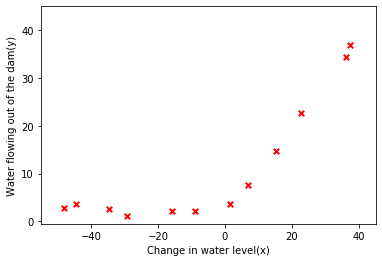

In [4]:
    part1_1()

In [5]:
    part1_2()

303.9931922202643


In [6]:
    part1_3()

[-15.30301567 598.25074417]


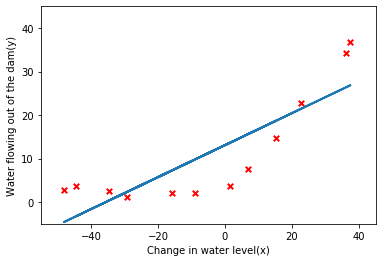

In [7]:
    part1_4()

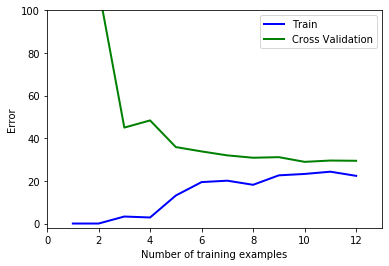

In [8]:
    part2_1()

[ 1.         -0.36214078 -0.75508669  0.18222588 -0.70618991  0.30661792
 -0.59087767  0.3445158  -0.50848117]


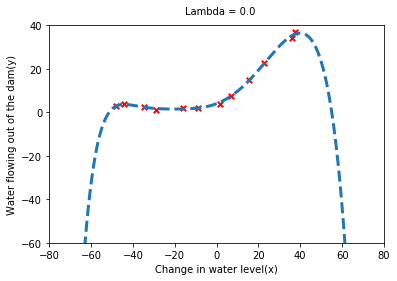

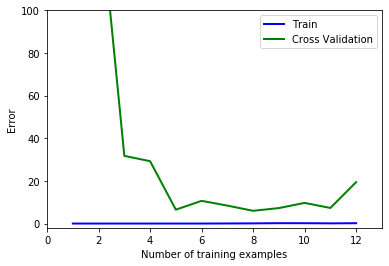

In [9]:
    part3_1()

[ 1.         -0.36214078 -0.75508669  0.18222588 -0.70618991  0.30661792
 -0.59087767  0.3445158  -0.50848117]


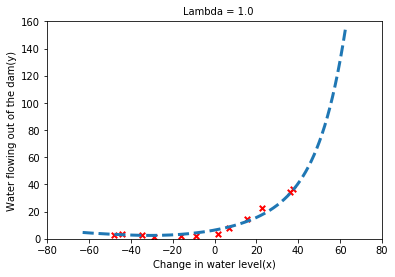

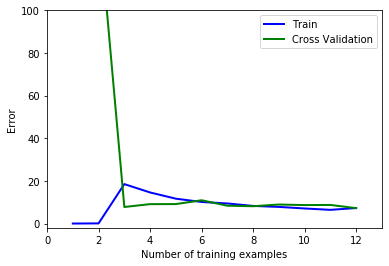

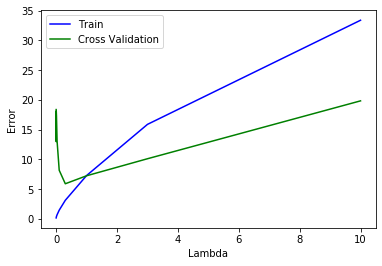

In [10]:
    part3_2()

In [ ]:
if __name__ == '__main__':
    main()